<a href="https://colab.research.google.com/github/denniss83/Egitim_Suresi_Gelismislik_ve_Kisi_Basi_Gelir_iliskisi/blob/main/E%C4%9Fitim_S%C3%BCresi%2C_Geli%C5%9Fmi%C5%9Flik_ve_Ki%C5%9Fi_Ba%C5%9F%C4%B1_Gelir_%C4%B0li%C5%9Fkisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Eğitim Süresi, Gelişmişlik ve Kişi Başı Gelir İlişkisi

Bu projede, 2023 yılına ait UNDP verileri kullanılarak dünya ülkelerinde:
- Ortalama eğitim süresi (Mean Years of Schooling),
- İnsani Gelişmişlik Endeksi (HDI),
- Kişi başı düşen gelir (GNI per capita, PPP)

arasındaki ilişkiler incelenmektedir. Amaç, eğitim süresinin sosyal ve ekonomik kalkınma üzerindeki etkisini analiz etmektir.

---

❗️⚠️ **Uyarı:** **Bu çalışma python ile veri analizi kapsamında eğitim ve portföy geliştirme amacıyla yapılmıştır. Kullanılan veriler UNDP kaynaklıdır. Hiçbir ticari amaç güdülmemektedir.**


# 1. Temel Değişkenler (HDI, GNI, Eğitim Süresi) Tanımı:
---
**İnsani Gelişmişlik Endeksi (HDI)**, bir ülkenin insan gelişimini ölçmek için kullanılan bileşik (kompozit) bir endekstir. Birleşmiş Milletler Kalkınma Programı (UNDP) tarafından geliştirilmiştir.

3 ana bileşeni vardır:

Eğitim: Ortalama eğitim süresi (yetişkinlerin kaç yıl eğitim aldığı), Beklenen eğitim süresi (çocukların alması beklenen eğitim süresi)

Sağlık: Doğumda beklenen yaşam süresi

Gelir: Kişi başı Gayri Safi Milli Gelir (GNI)

Skala: 0 ile 1 arasında değişir.

0.800 – 1.000 → Çok yüksek

0.700 – 0.799 → Yüksek

0.550 – 0.699 → Orta

0.000 – 0.549 → Düşük

---
**Kişi Başına Gayri Safi Milli Gelir (GNI)**, GSMH, bir ülkenin vatandaşlarının toplam geliridir. Bu, yurt içi üretim + yurt dışından elde edilen gelirleri kapsar.

Kişi Başı GSMH = Toplam GSMH / Nüfus

Ülke vatandaşlarının ortalama gelir düzeyini görmek.
Veri genellikle satın alma gücü paritesine göre $ doları cinsindendir, böylece ülkeler arası adil kıyaslama yapılabilir.

---

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
plt.style.use("ggplot")

## Veri Hakkında Açıklama

Bu veri kümesi, UNDP'nin 2023 İnsan Gelişimi Raporu’ndan alınmış olup 190’dan fazla ülkenin:

- **İnsani Gelişmişlik Endeksi (HDI)**
- **Ortalama Eğitim Süresi (Mean Years of Schooling)**
- **Kişi Başı GNI (Gayrisafi Milli Gelir, PPP)**

bilgilerini içermektedir.

Veri, her ülke için 2023 yılına aittir. Analizin amacı, ülkelerin eğitim düzeyi ile gelişmişlik ve ekonomik refah düzeyleri arasındaki ilişkileri incelemektir.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


## Veri Seti Hakkında Bilgi

In [11]:
df = pd.read_csv("data.csv")
df.head()


,Unnamed: 0,Country,HDI,Mean_Years_Schooling,GNI_per_Capita
0,2,Iceland,0.972,18.850590,69116.93736
1,3,Norway,0.970,18.792850,112710.02110
2,4,Switzerland,0.970,16.667530,81948.90177
3,5,Denmark,0.962,18.704010,76007.85669
4,6,Germany,0.959,17.309219,64053.22124


In [12]:
print(f"Toplam ülke sayısı: {df.shape[0]}")
print("\nSütunlar:", df.columns.tolist())
df.info()
df.describe()

Toplam ülke sayısı: 208

Sütunlar: ['Unnamed: 0', 'Country', 'HDI', 'Mean_Years_Schooling', 'GNI_per_Capita']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            208 non-null    int64  
 1   Country               208 non-null    object 
 2   HDI                   208 non-null    float64
 3   Mean_Years_Schooling  208 non-null    float64
 4   GNI_per_Capita        208 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.3+ KB


,Unnamed: 0,HDI,Mean_Years_Schooling,GNI_per_Capita
count,208.000000,208.000000,208.000000,208.000000
mean,107.288462,0.739683,13.549317,24197.035900
std,62.190866,0.149245,3.022233,25365.434785
min,2.000000,0.388000,5.634770,688.347277
25%,53.750000,0.626500,11.508805,5863.591542
50%,106.500000,0.758500,13.319810,15933.833790
75%,159.250000,0.854250,15.656165,35844.572170
max,223.000000,0.972000,20.845501,166811.674100


# 2.İnsani Gelişmişlik Endeksine Göre En Yüksek ve En Düşük 5 Ülke

In [13]:
top_5 = df.sort_values(by="HDI", ascending=False).head()
bottom_5 = df.sort_values(by="HDI", ascending=True).head()

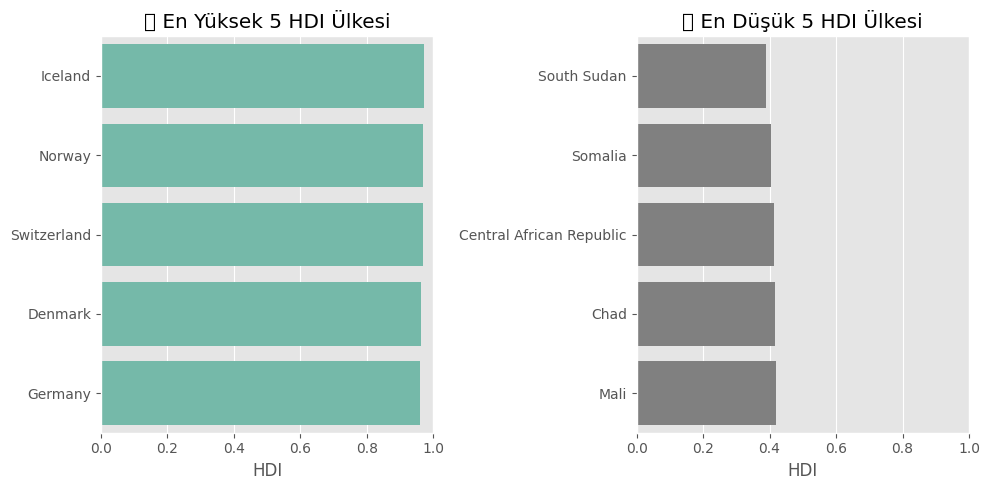

In [78]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=top_5, x="HDI", y="Country", color="#6AC4AF")
plt.title("🔝 En Yüksek 5 HDI Ülkesi")
plt.xlabel("HDI")
plt.ylabel("")
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=bottom_5, x="HDI", y="Country", color="gray")
plt.title("🔻 En Düşük 5 HDI Ülkesi")
plt.xlabel("HDI")
plt.ylabel("")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

## 2.1 İlk 30 Ülke ve Türkiye'nin İnsani Gelişmişlik Endeksi Değeri

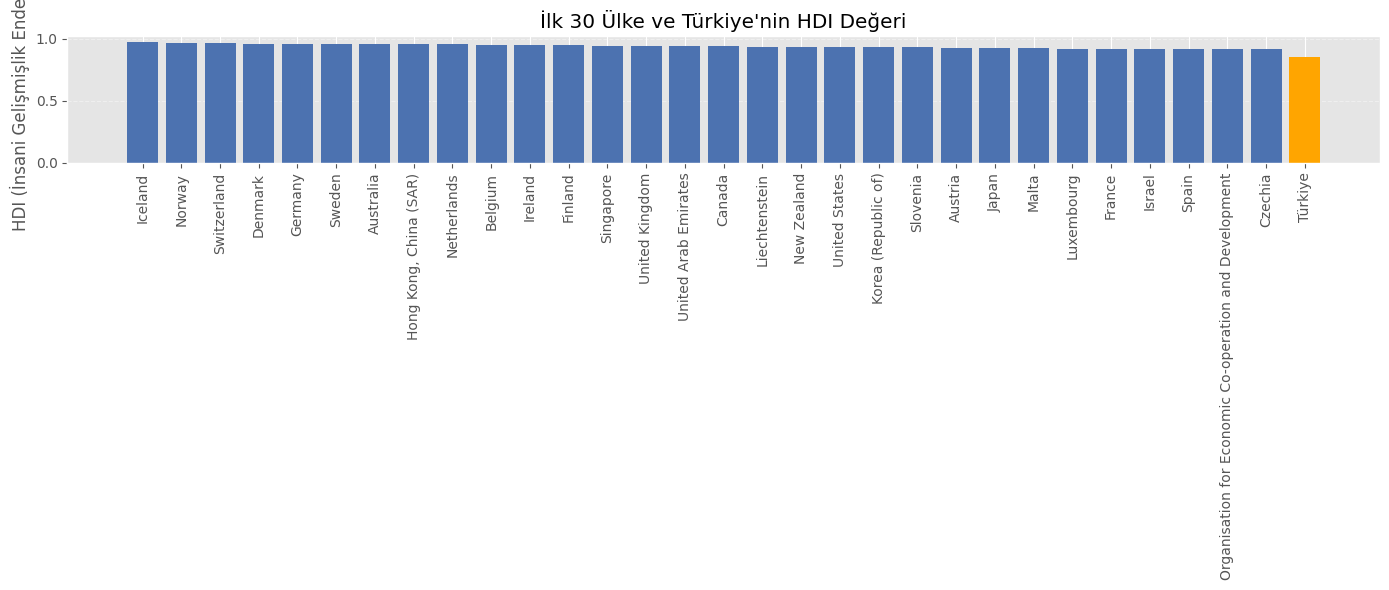

In [59]:
top30_hdi = df.sort_values("HDI", ascending=False).head(30).copy()

turkey_row = df[df["Country"] == "Türkiye"]

if not turkey_row["Country"].isin(top30_hdi["Country"]).any():
    top30_hdi = pd.concat([top30_hdi, turkey_row])

top30_hdi = top30_hdi.sort_values("HDI", ascending=False).reset_index(drop=True)

colors = ['#4C72B0' if country != 'Türkiye' else 'orange' for country in top30_hdi["Country"]]

plt.figure(figsize=(14, 6))
plt.bar(top30_hdi["Country"], top30_hdi["HDI"], color=colors)
plt.title("İlk 30 Ülke ve Türkiye'nin HDI Değeri")
plt.ylabel("HDI (İnsani Gelişmişlik Endeksi)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 3.Ortalama Eğitim Süresine Göre En yüksek ve En Düşük 5 Ülke


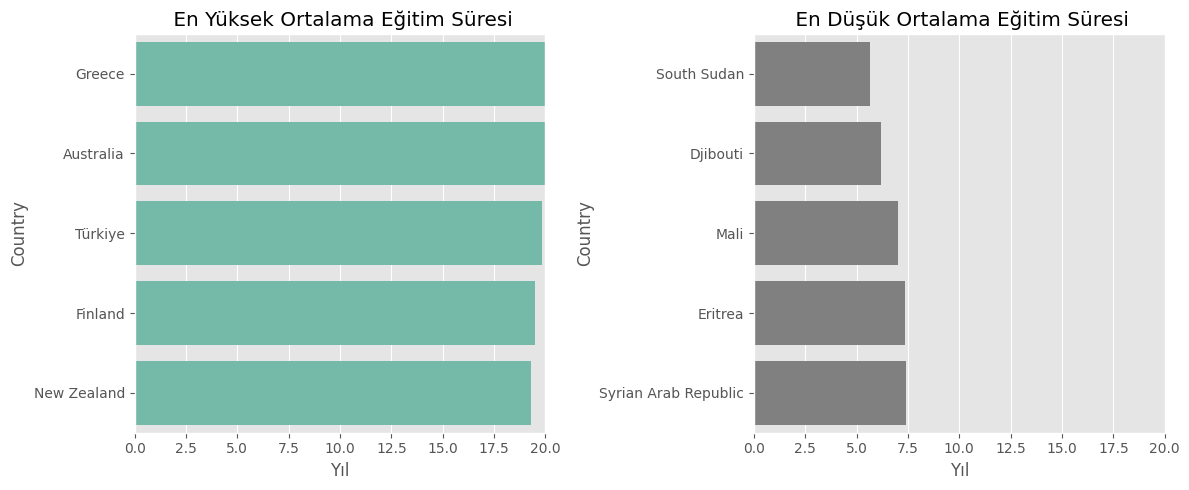

In [77]:
top5_edu = df.sort_values(by="Mean_Years_Schooling", ascending=False).head()
bottom5_edu = df.sort_values(by="Mean_Years_Schooling", ascending=True).head()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=top5_edu, y="Country", x="Mean_Years_Schooling", color="#6AC4AF")
plt.title(" En Yüksek Ortalama Eğitim Süresi")
plt.xlabel("Yıl")
plt.xlim(0, 20)

plt.subplot(1, 2, 2)
sns.barplot(data=bottom5_edu, y="Country", x="Mean_Years_Schooling", color="gray")
plt.title(" En Düşük Ortalama Eğitim Süresi")
plt.xlabel("Yıl")
plt.xlim(0, 20)

plt.tight_layout()
plt.show()

## 3.1 İlk 30 Ülke ve Türkiye'nin Ortalama Eğitim Süresi


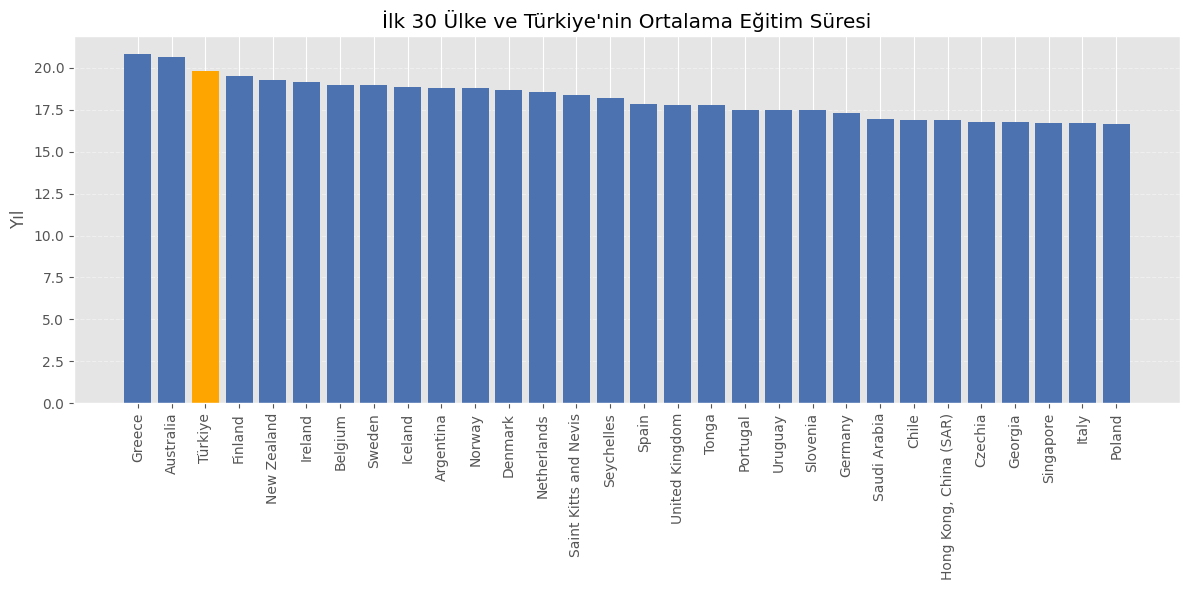

In [58]:
plt.figure(figsize=(12, 6))

colors = ['#4C72B0' if country != 'Türkiye' else 'orange' for country in top30_edu['Country']]

bars = plt.bar(top30_edu["Country"], top30_edu["Mean_Years_Schooling"], color=colors)

plt.title("İlk 30 Ülke ve Türkiye'nin Ortalama Eğitim Süresi")
plt.ylabel("Yıl")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 4.Kişibaşı GSMH'a Göre En Yüksek ve En Düşük 5 Ülke

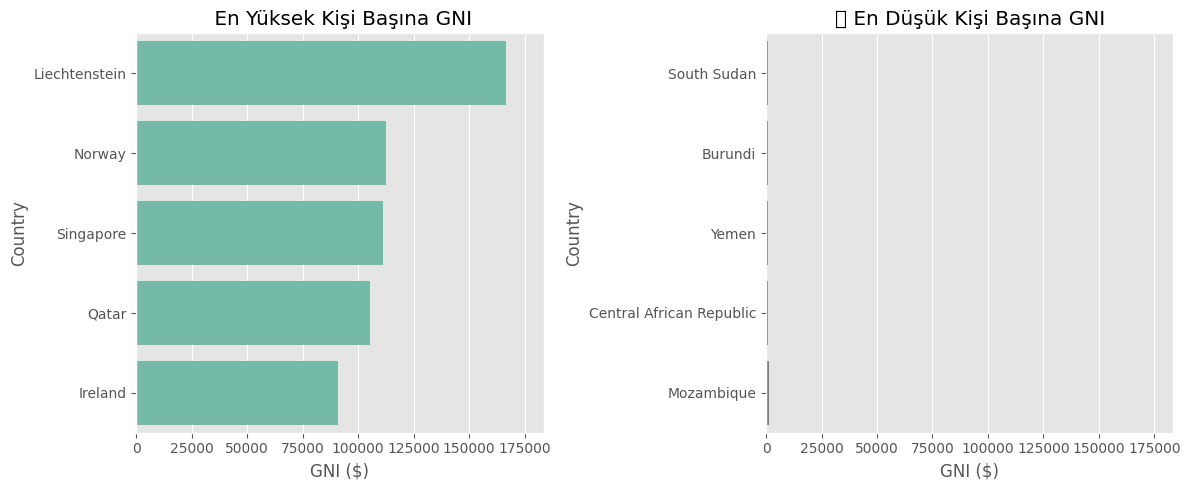

In [71]:
top5_gni = df.sort_values(by="GNI_per_Capita", ascending=False).head()
bottom5_gni = df.sort_values(by="GNI_per_Capita", ascending=True).head()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=top5_gni, y="Country", x="GNI_per_Capita", color="#6AC4AF")
plt.title(" En Yüksek Kişi Başına GNI")
plt.xlabel("GNI ($)")
plt.xlim(0, df["GNI_per_Capita"].max() * 1.1)

plt.subplot(1, 2, 2)
sns.barplot(data=bottom5_gni, y="Country", x="GNI_per_Capita", color="gray")
plt.title("📄 En Düşük Kişi Başına GNI")
plt.xlabel("GNI ($)")
plt.xlim(0, df["GNI_per_Capita"].max() * 1.1)

plt.tight_layout()
plt.show()

## 4.1 İlk 30 Ülke ve Türkiye'nin Kişi Başı GSMH Değeri

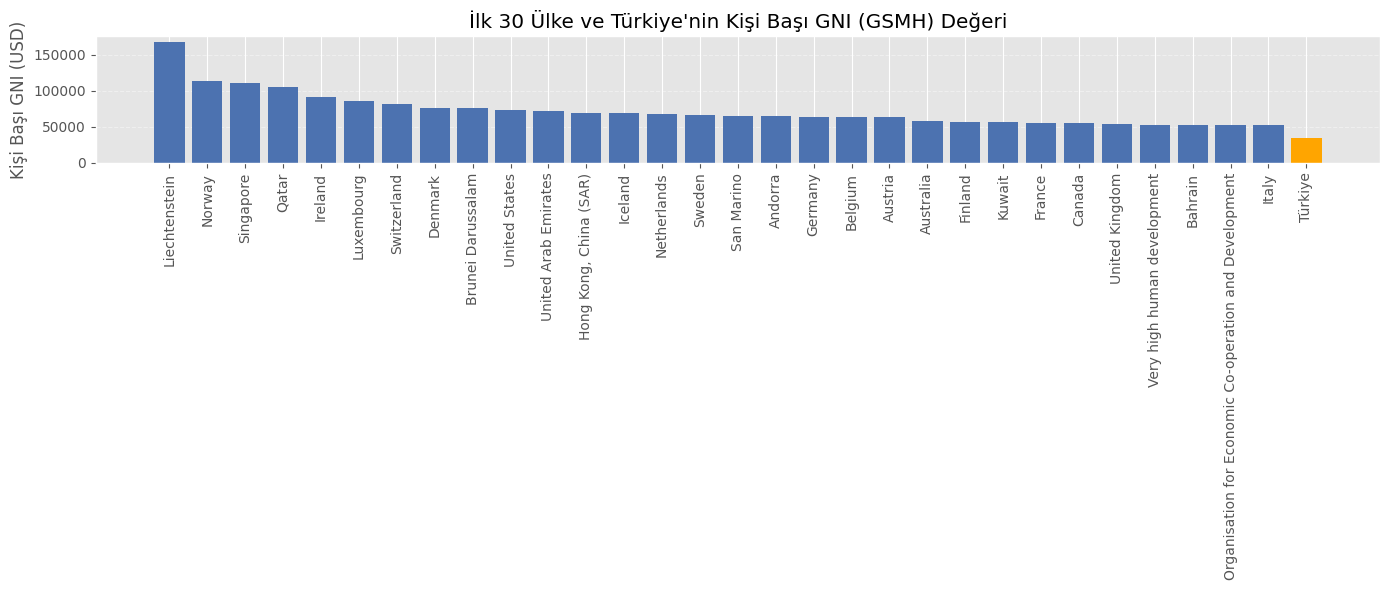

In [64]:
top30_gni = df.sort_values("GNI_per_Capita", ascending=False).head(30).copy()

turkey_row = df[df["Country"] == "Türkiye"]

if not turkey_row["Country"].isin(top30_gni["Country"]).any():
    top30_gni = pd.concat([top30_gni, turkey_row])

top30_gni = top30_gni.sort_values("GNI_per_Capita", ascending=False).reset_index(drop=True)

colors = ['orange' if country == 'Türkiye' else '#4C72B0' for country in top30_gni["Country"]]

plt.figure(figsize=(14, 6))
plt.bar(top30_gni["Country"], top30_gni["GNI_per_Capita"], color=colors)
plt.title("İlk 30 Ülke ve Türkiye'nin Kişi Başı GNI (GSMH) Değeri")
plt.ylabel("Kişi Başı GNI (USD)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 5.Kişi Başı GSMH Yüksek, İnsani Geişmişlik Düzeyi Düşük: Gelişmişlik Beklentisinin Gerisinde Kalan Ülkeler

In [72]:
df["HDI_Rank"] = df["HDI"].rank(ascending=False)
df["GNI_Rank"] = df["GNI_per_Capita"].rank(ascending=False)

df["Rank_Diff"] = df["GNI_Rank"] - df["HDI_Rank"]

df["Abs_Diff"] = df["Rank_Diff"].abs()

mismatch = df.sort_values(by="Abs_Diff", ascending=False).head(10)

mismatch[["Country", "HDI", "GNI_per_Capita", "HDI_Rank", "GNI_Rank", "Rank_Diff"]]

,Country,HDI,GNI_per_Capita,HDI_Rank,GNI_Rank,Rank_Diff
89,Guyana,0.776,46959.251730,95.0,37.0,-58.0
59,Brunei Darussalam,0.837,75826.873380,62.5,9.0,-53.5
123,Nauru,0.703,19642.377700,134.0,85.0,-49.0
91,Tonga,0.769,7438.210092,98.0,142.0,44.0
42,Qatar,0.886,105353.268000,45.0,4.0,-41.0
115,Libya,0.721,19831.432360,123.5,83.0,-40.5
174,Djibouti,0.513,6367.606026,190.0,151.0,-39.0
96,Cuba,0.762,8415.411708,103.0,138.0,35.0
102,Saint Lucia,0.748,20899.781930,110.0,77.0,-33.0
51,Kuwait,0.852,56612.046990,54.0,23.0,-31.0


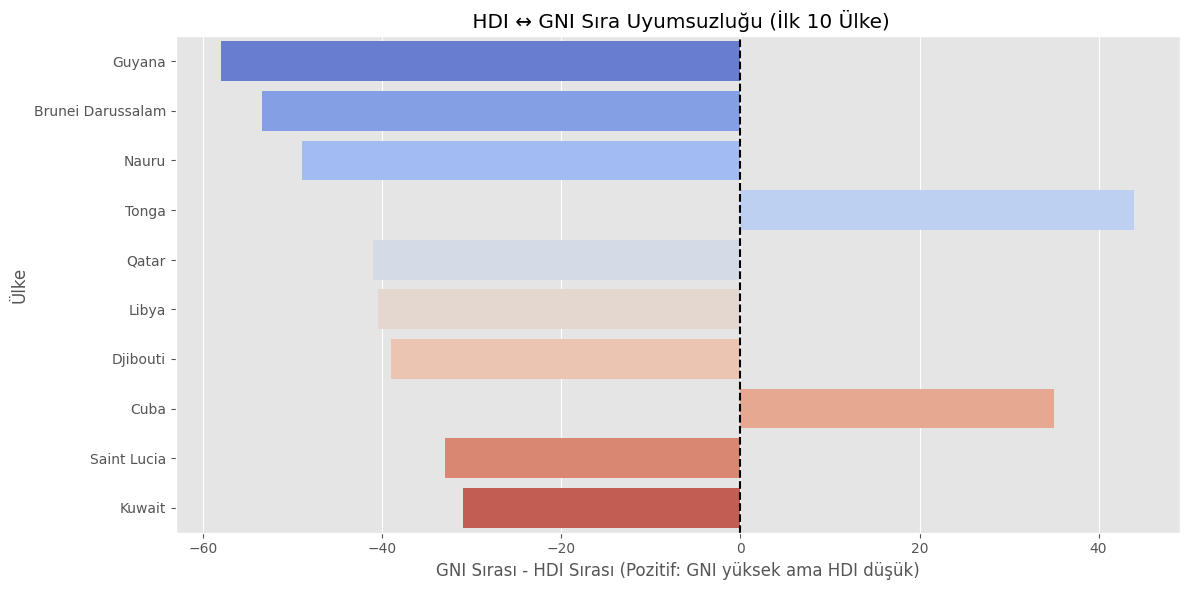

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mismatch, x="Rank_Diff", y="Country", palette="coolwarm")

plt.axvline(0, color='black', linestyle='--')
plt.title(" HDI ↔ GNI Sıra Uyumsuzluğu (İlk 10 Ülke)")
plt.xlabel("GNI Sırası - HDI Sırası (Pozitif: GNI yüksek ama HDI düşük)")
plt.ylabel("Ülke")
plt.tight_layout()
plt.show()

📌 **NOT:**
1.    Pozitif Rank_Diff: GNI sırası daha yüksek ama HDI beklentinin altında, Yani ekonomik gelir yüksek ama gelişmişlik seviyesi düşük
2.   Negatif Rank_Diff: GNI düşük ama HDI beklenenden yüksek. Yani kaynak az ama etkili kullanılıyor





---


Geliri Düşük, Gelişmişliği Yüksek Ülkeler;
Bu ülkeler maddi kaynakları sınırlı olsa da; sağlık hizmetlerine erişim, eğitim süresi ve yaşam kalitesi gibi alanlarda başarılı olup yüksek gelişmişlik düzeyine ulaşabilmişlerdir. (negatif rank)

Geliri Yüksek, Gelişmişliği Düşük Ülkeler;
Bu ülkeler ekonomik olarak zengin görünse de, eğitim süresi, yaşam beklentisi ve sağlık gibi sosyal gelişmişlik kriterlerinde zayıf kalmaktadır. (pozitif rank)


---





---


Bu Farklılıklar Neden Olabilir?

Kişi başına düşen gelir, yalnızca ekonomik gücü gösterirken; İnsani Gelişmişlik Endeksi, eğitim süresi, sağlık hizmetleri ve yaşam beklentisi gibi insani faktörleri dikkate alır. Bu nedenle:

--> Geliri yüksek ama gelişmişliği düşük ülkelerde; gelir dağılımındaki adaletsizlik, düşük eğitim oranı ve sağlık sistemindeki eksiklikler etkili olabilir.

--> Geliri düşük ama gelişmişliği yüksek ülkeler ise kaynaklarını etkin kullanarak, özellikle eğitim ve sağlık alanına yaptıkları yatırımlarla toplumsal refahı artırmayı başarmıştır.


---



# 6.Korelasyon Analizi

## 6.1 Eğitim Süresi, İnsani Gelişmişlik Endeksi ve Kişi Başı GSMH Arasındaki İlişkilerin İncelenmesi

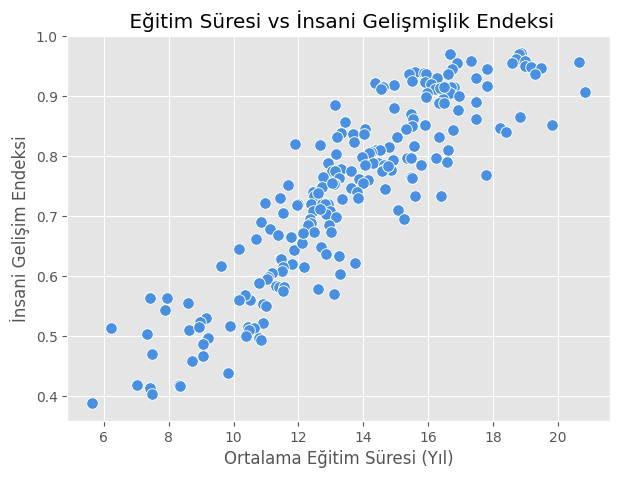

In [48]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Mean_Years_Schooling", y="HDI", color="#4A90E2", s=70)
plt.title(" Eğitim Süresi vs İnsani Gelişmişlik Endeksi")
plt.xlabel("Ortalama Eğitim Süresi (Yıl)")
plt.ylabel("İnsani Gelişim Endeksi")
plt.grid(True)
plt.show()

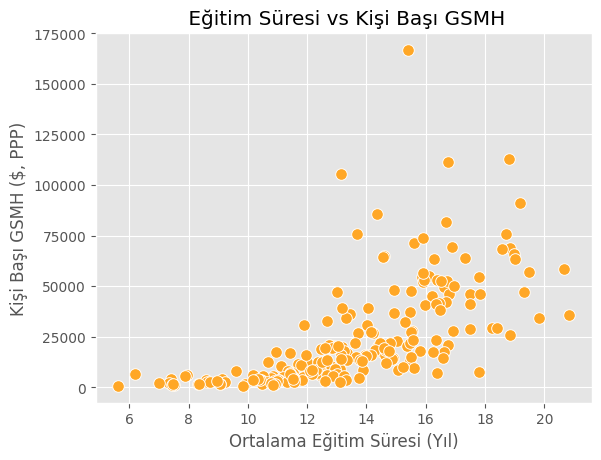

In [47]:
sns.scatterplot(data=df, x="Mean_Years_Schooling", y="GNI_per_Capita", color="#FFA726", s=70)
plt.title(" Eğitim Süresi vs Kişi Başı GSMH")
plt.xlabel("Ortalama Eğitim Süresi (Yıl)")
plt.ylabel("Kişi Başı GSMH ($, PPP)")
plt.grid(True)
plt.show()

In [17]:
corr = df[['Mean_Years_Schooling', 'HDI', 'GNI_per_Capita']].corr()
print("📈 Korelasyon Matrisi:\n")
print(corr.round(3))

📈 Korelasyon Matrisi:

                      Mean_Years_Schooling    HDI  GNI_per_Capita
Mean_Years_Schooling                 1.000  0.892           0.645
HDI                                  0.892  1.000           0.784
GNI_per_Capita                       0.645  0.784           1.000




---


En güçlü korelasyon, insani gelişmişlik ile kişi başına gelir arasında görülmektedir (r = 0.784). Bu durum, ekonomik refahın insani gelişmişliği doğrudan etkilediğini göstermektedir.

Ancak, ortalama eğitim süresi ile insani gelişmişlik arasındaki ilişki de oldukça anlamlıdır (r = 0.665).

Sonuç olarak, hem ekonomik güç hem de eğitim düzeyi, insani gelişmişliğin önemli belirleyicileridir. Fakat bu veri setine göre ekonomik göstergenin etkisi biraz daha yüksektir.


---



# 7. Regresyon Analizi

## 7.1 Eğitim süresi ve İnsani Gelişmişlik Arasındaki Regresyon

In [74]:
X = df[['Mean_Years_Schooling']]
y = df['HDI']

model_hdi = LinearRegression()
model_hdi.fit(X, y)

print("🎓 Eğitim Süresi → HDI")
print(f"Katsayı (Eğim): {model_hdi.coef_[0]:.4f}")
print(f"Y_ekseni kesişimi: {model_hdi.intercept_:.4f}")
print(f"R² Skoru: {model_hdi.score(X, y):.4f}")

🎓 Eğitim Süresi → HDI
Katsayı (Eğim): 0.0441
Y_ekseni kesişimi: 0.1428
R² Skoru: 0.7958


📌 **NOT:** Bu oldukça güçlü bir determinasyon katsayısıdır (R²).

Eğitim süresi arttıkça HDI'nin anlamlı şekilde yükseldiğini doğrular.

Korelasyon matrisinde de 0.86'lık yüksek korelasyon vardı; bu doğrusal modelle de desteklenmiş oluyor

## 7.2 Eğitim Süresi ile Kişi Başı GSMH Arasındaki Regresyon

In [49]:
df['Log_GNI'] = np.log(df['GNI_per_Capita'])

X = df[['Mean_Years_Schooling']]
y_log = df['Log_GNI']

model_gni = LinearRegression()
model_gni.fit(X, y_log)

print("\n🎓 Eğitim Süresi → Log(Kişi Başı GNI)")
print(f"Katsayı (Eğim): {model_gni.coef_[0]:.4f}")
print(f"Y_ekseni kesişimi: {model_gni.intercept_:.4f}")
print(f"R² Skoru: {model_gni.score(X, y_log):.4f}")


🎓 Eğitim Süresi → Log(Kişi Başı GNI)
Katsayı (Eğim): 0.3127
Y_ekseni kesişimi: 5.2842
R² Skoru: 0.6538


📌 **NOT:** Bu orta düzeyde bir doğrusal ilişkiyi gösterir.

Yani eğitim düzeyi yükseldikçe GNI artışı beklenebilir, fakat ekonomik gelir sadece eğitimden etkilenmez – iş gücü piyasası, kaynak dağılımı, politika gibi başka birçok faktör etkili olabilir.

## 7.3 Eğitim Süresi → İnsani Gelişmişlik Endeksi (Regresyon çizgisiyle)

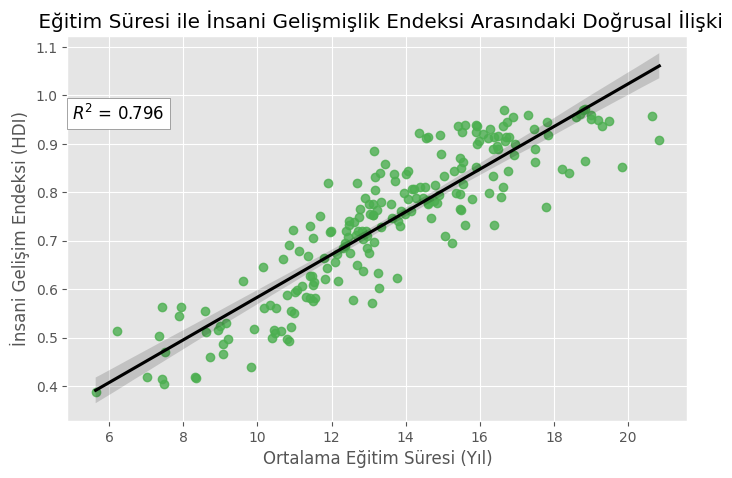

In [75]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="Mean_Years_Schooling", y="HDI", color="#4CAF50", line_kws={"color": "black"})
plt.title(" Eğitim Süresi ile İnsani Gelişmişlik Endeksi Arasındaki Doğrusal İlişki")
plt.xlabel("Ortalama Eğitim Süresi (Yıl)")
plt.ylabel("İnsani Gelişim Endeksi (HDI)")

r2_hdi = model_hdi.score(df[['Mean_Years_Schooling']], df['HDI'])
plt.text(5, 0.95, f"$R^2$ = {r2_hdi:.3f}", fontsize=12, bbox=dict(facecolor='white', edgecolor='gray'))

plt.grid(True)
plt.show()

## 7.4 Eğitim Süresi → Kişi Başı GSMH (Log Dönüşümlü)

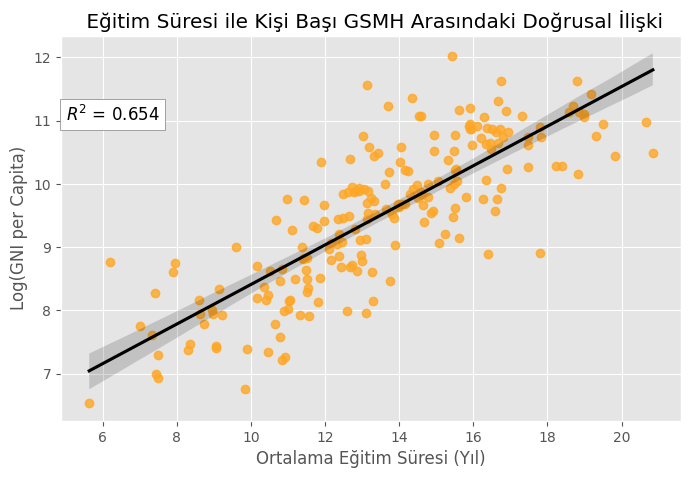

In [51]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x="Mean_Years_Schooling", y="Log_GNI", color="#FFA726", line_kws={"color": "black"})
plt.title(" Eğitim Süresi ile Kişi Başı GSMH Arasındaki Doğrusal İlişki")
plt.xlabel("Ortalama Eğitim Süresi (Yıl)")
plt.ylabel("Log(GNI per Capita)")

r2_gni = model_gni.score(df[['Mean_Years_Schooling']], df['Log_GNI'])
plt.text(5, 11, f"$R^2$ = {r2_gni:.3f}", fontsize=12, bbox=dict(facecolor='white', edgecolor='gray'))

plt.grid(True)
plt.show()

📌 **NOT:** Log dönüşümü, veriyi sıkıştırır ve dağılımı normalize ederek daha doğrusal bir ilişki ortaya çıkarmaya yardımcı olur.

# 8.Türkiye'nin Durumu (2023 UNDP Verisiyle)

In [28]:
turkiye = df[df['Country'] == 'Türkiye']

In [29]:
hdi = turkiye['HDI'].values[0]
egitim = turkiye['Mean_Years_Schooling'].values[0]
gni = turkiye['GNI_per_Capita'].values[0]

print("📌 Türkiye'nin 2023 Verileri:\n")
print(f"🔹 HDI: {hdi:.3f}")
print(f"🔹 Ortalama Eğitim Süresi: {egitim:.1f} yıl")
print(f"🔹 Kişi Başı GNI (PPP): ${gni:,.0f}")

📌 Türkiye'nin 2023 Verileri:

🔹 HDI: 0.853
🔹 Ortalama Eğitim Süresi: 19.8 yıl
🔹 Kişi Başı GNI (PPP): $34,507


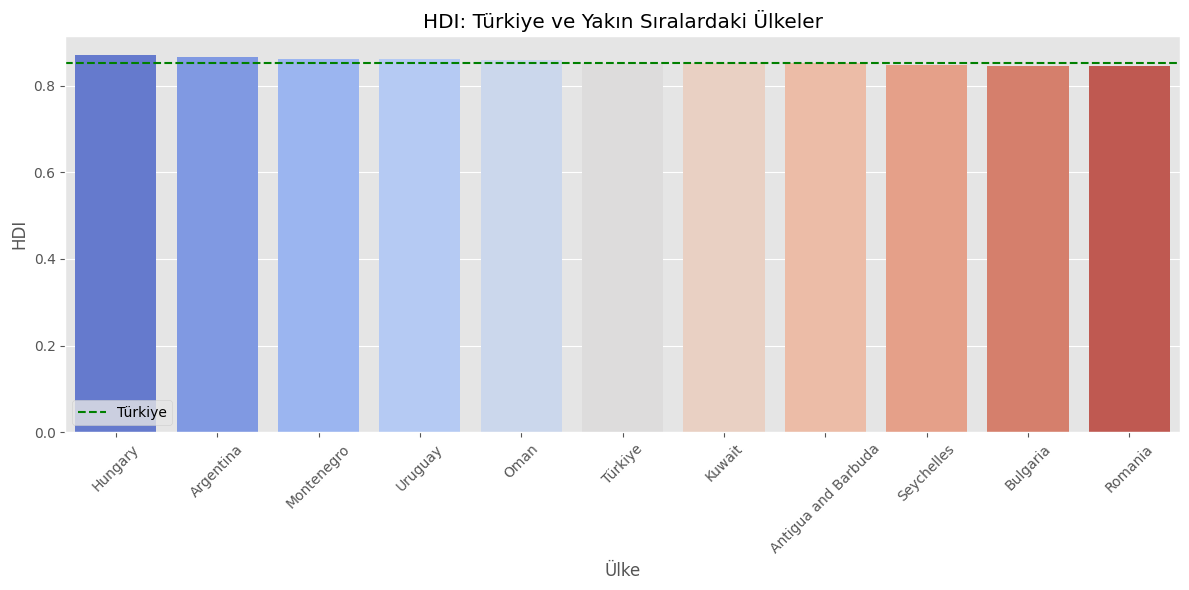

In [76]:
turkiye_index = df_sorted[df_sorted['Country'] == 'Türkiye'].index[0]

start = max(turkiye_index - 5, 0)
end = min(turkiye_index + 6, len(df_sorted))

turkiye_zone = df_sorted.iloc[start:end]

plt.figure(figsize=(12, 6))
sns.barplot(data=turkiye_zone, x='Country', y='HDI', palette='coolwarm')
plt.axhline(y=turkiye_hdi, color='green', linestyle='--', label='Türkiye')
plt.title('HDI: Türkiye ve Yakın Sıralardaki Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('HDI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

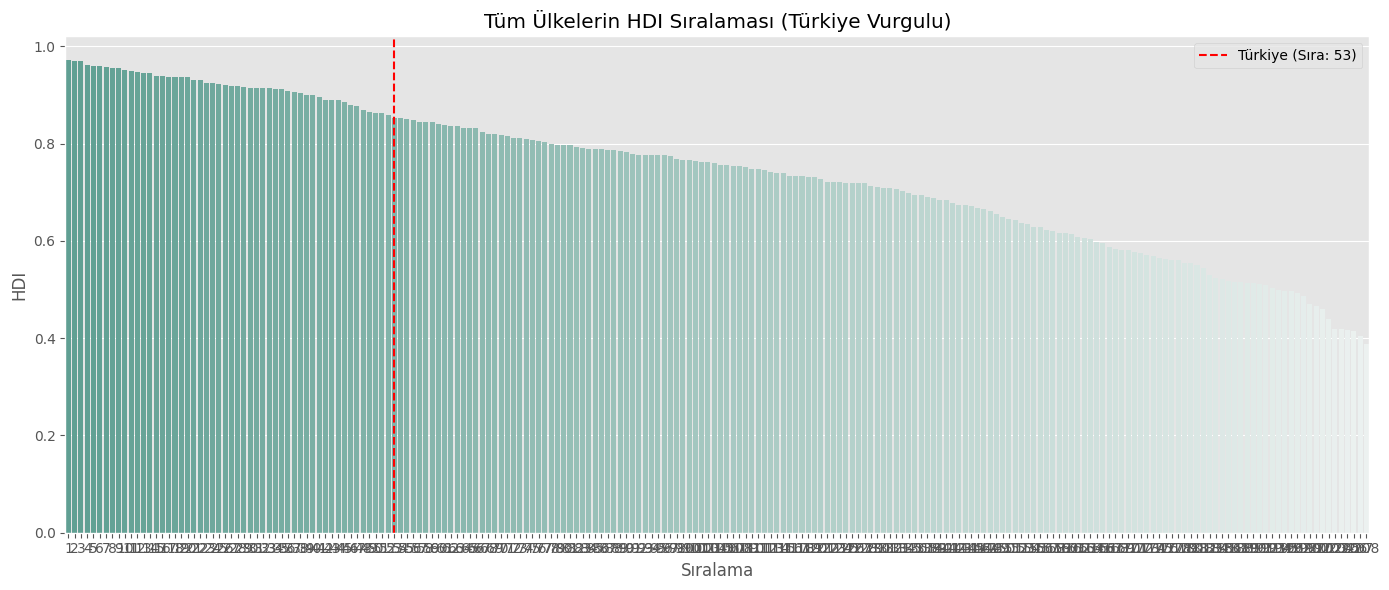

In [34]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_sorted, x='Rank', y='HDI', palette='light:#5A9_r')

plt.axvline(x=turkiye_rank - 1, color='red', linestyle='--', label=f'Türkiye (Sıra: {turkiye_rank})')
plt.title('Tüm Ülkelerin HDI Sıralaması (Türkiye Vurgulu)')
plt.xlabel('Sıralama')
plt.ylabel('HDI')
plt.legend()
plt.tight_layout()
plt.show()

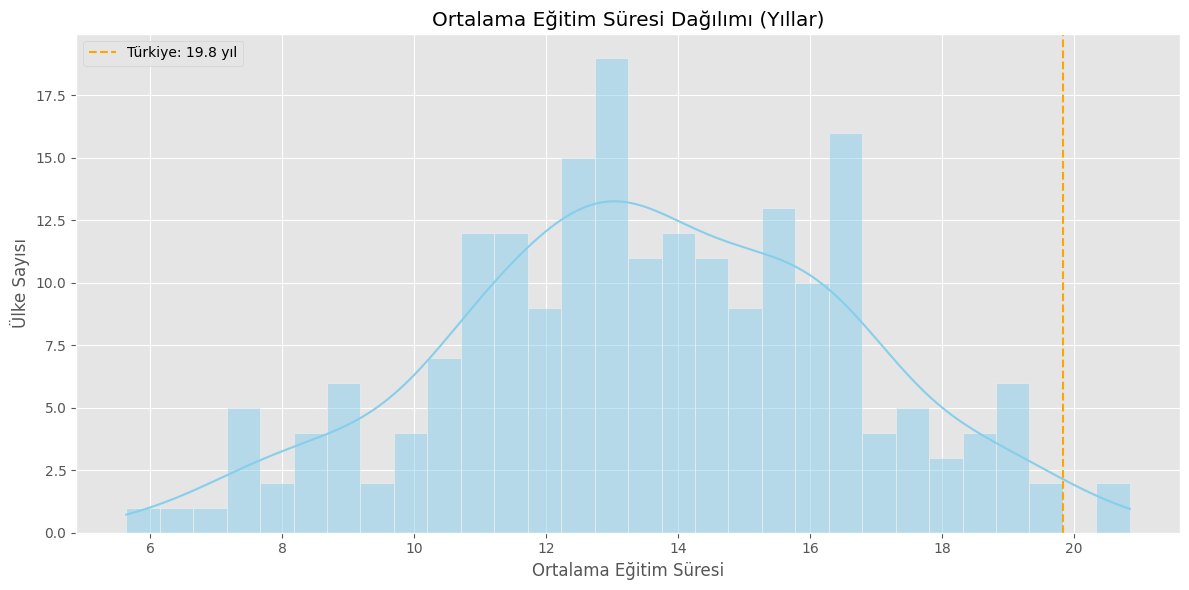

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Mean_Years_Schooling'], bins=30, kde=True, color='skyblue')

plt.axvline(x=egitim, color='orange', linestyle='--', label=f"Türkiye: {egitim:.1f} yıl")
plt.title("Ortalama Eğitim Süresi Dağılımı (Yıllar)")
plt.xlabel("Ortalama Eğitim Süresi")
plt.ylabel("Ülke Sayısı")
plt.legend()
plt.tight_layout()
plt.show()

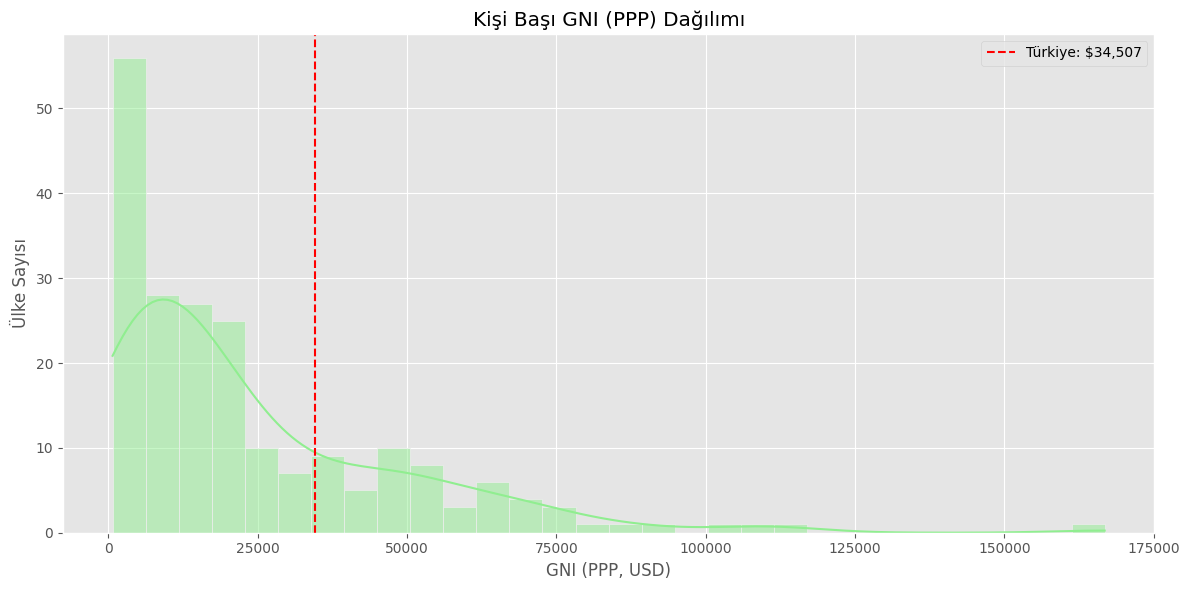

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df['GNI_per_Capita'], bins=30, kde=True, color='lightgreen')

plt.axvline(x=gni, color='red', linestyle='--', label=f"Türkiye: ${gni:,.0f}")
plt.title("Kişi Başı GNI (PPP) Dağılımı")
plt.xlabel("GNI (PPP, USD)")
plt.ylabel("Ülke Sayısı")
plt.legend()
plt.tight_layout()
plt.show()